purpose: plot p-value and betas for rare variant phewas

# set-up

In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ndex2
import networkx as nx

In [3]:
#rare=1
color1="#25BE93"
#common=color2
color2="#C673dc"
#both=color3
color3="#3636eb"
#neither=color4
color4="#CCCCCC"
color1b="#09694e"
color2b="#642475"

# plot variant tables

In [9]:
path='rare_variant_genebass/alcohol_intake/single_variant_phewas_rare_variants/'

In [10]:
rare_var=pd.read_csv('rare_variant_genebass/alcohol_intake/alcohol_intake_variant_tbl_maf05.tsv',sep='\t',low_memory=False)

In [12]:
rare_var_sig=rare_var[rare_var['Pvalue']<8e-9]

In [13]:
rare_var_sig

,locus,alleles,markerID,gene,annotation,call_stats.AC,call_stats.AF,call_stats.AN,call_stats.homozygote_count,n_cases,...,category,AC,AF,BETA,SE,AF.Cases,AF.Controls,Pvalue,CHR,POS
1122042,chr2:189720662,"[""A"",""G""]",chr2:189720662_A/G,ANKAR,missense,2.0,0.000003,788940.0,0.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,2,0.000003,3.842300,0.657150,NaN,NaN,5.009300e-09,2,189720662
1872076,chr4:99318162,"[""T"",""C""]",chr4:99318162_T/C,ADH1B,missense,771750.0,0.977310,789664.0,377146.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,768359,0.977310,0.201370,0.007055,NaN,NaN,3.226100e-179,4,99318162
1872323,chr4:99347033,"[""C"",""A""]",chr4:99347033_C/A,ADH1C,pLoF,6489.0,0.008217,789680.0,27.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,6463,0.008221,-0.139440,0.011616,NaN,NaN,3.388300e-33,4,99347033
1875046,chr4:99653659,"[""T"",""C""]",chr4:99653659_T/C,C4orf54,synonymous,15610.0,0.019877,785314.0,140.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,15631,0.019882,-0.046846,0.007548,NaN,NaN,5.418300e-10,4,99653659
1944350,chr4:153204551,"[""T"",""G""]",chr4:153204551_T/G,TRIM2,pLoF,2.0,0.000003,789682.0,0.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,2,0.000003,3.842300,0.657150,NaN,NaN,5.009300e-09,4,153204551
3265943,chr8:124562946,"[""G"",""A""]",chr8:124562946_G/A,MTSS1,missense,2.0,0.000003,789682.0,0.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,2,0.000003,3.842300,0.657150,NaN,NaN,5.009300e-09,8,124562946
4215297,chr11:66421187,"[""G"",""A""]",chr11:66421187_G/A,NPAS4,missense,2.0,0.000003,789662.0,0.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,2,0.000003,3.842300,0.657150,NaN,NaN,5.009300e-09,11,66421187
6363654,chr18:62958753,"[""T"",""C""]",chr18:62958753_T/C,PHLPP1,missense,2.0,0.000003,789678.0,0.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,2,0.000003,3.842300,0.657150,NaN,NaN,5.009300e-09,18,62958753
7564769,chrX:152653134,"[""AAG"",""A""]",chrX:152653134_AAG/A,GABRQ,LC,2.0,0.000003,607119.0,0.0,393099,...,UK Biobank Assessment Centre > Touchscreen > L...,2,0.000003,3.842300,0.657150,NaN,NaN,5.009300e-09,X,152653134


In [8]:
npheno=4529 #based on paper
nvar=len(phewas_dict)
cutoff=1/(nvar*npheno)
#cutoff=8e-9

NameError: name 'phewas_dict' is not defined

In [ ]:
phewas_dict={'chr11:66421187_G/A': 'variant-phewas-exomes_11-66421187-G-A_2023_11_20_13_43_01.csv',
'chr18:62958753_T/C':'variant-phewas-exomes_18-62958753-T-C_2023_11_20_13_43_20.csv',
'chr2:189720662_A/G':'variant-phewas-exomes_2-189720662-A-G_2023_11_20_13_41_26.csv',
'chr4:153204551_T/G':'variant-phewas-exomes_4-153204551-T-G_2023_11_20_13_42_31.csv',
'chr4:99318162_T/C':'variant-phewas-exomes_4-99318162-T-C_2023_11_20_13_41_39.csv',
'chr4:99347033_C/A':'variant-phewas-exomes_4-99347033-C-A_2023_11_20_13_41_52.csv',
'chr4:99653659_T/C':'variant-phewas-exomes_4-99653659-T-C_2023_11_20_13_42_14.csv',
'chr8:124562946_G/A':'variant-phewas-exomes_8-124562946-G-A_2023_11_20_13_42_41.csv',
'chrX:152653134_AAG/A':'variant-phewas-exomes_X-152653134-AAG-A_2023_11_20_13_43_40.csv'}

In [ ]:
phewas=pd.read_csv(path+phewas_dict['chr4:99318162_T/C'])
tbl=phewas[phewas['P-Value']<cutoff]


In [ ]:
from adjustText import adjust_text

In [ ]:
for i in rare_var_sig.markerID:
    print(i)
    print(rare_var_sig[rare_var_sig.markerID==i]['call_stats.AC'])
    phewas=pd.read_csv(path+phewas_dict[i],sep=',')
    tbl=phewas[phewas['P-Value']<cutoff]
    fig=plt.figure()
    ax=fig.add_subplot()
    plt.scatter(tbl.Beta,-np.log10(tbl['P-Value']),alpha=0.5,color=color1)
    plt.title(i+" Associated Phenotypes")
    plt.ylabel('-log(p-value)')
    plt.xlabel('beta (z)')
    texts=[]
    for j in tbl.index:
        #print(txt)
        #print(tbl.Beta[j])
        #print(-np.log10(tbl['P-Value'][j]))
        texts.append(plt.text(tbl.Beta[j],-np.log10(tbl['P-Value'][j]),tbl['Description'][j]))
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))
    plt.show()
    
    plt.savefig("figures/phewas_arrow_"+i.replace("/","-")+'.svg',bbox_inches='tight')
    plt.clf()

chr2:189720662_A/G
1122042    2.0
Name: call_stats.AC, dtype: float64


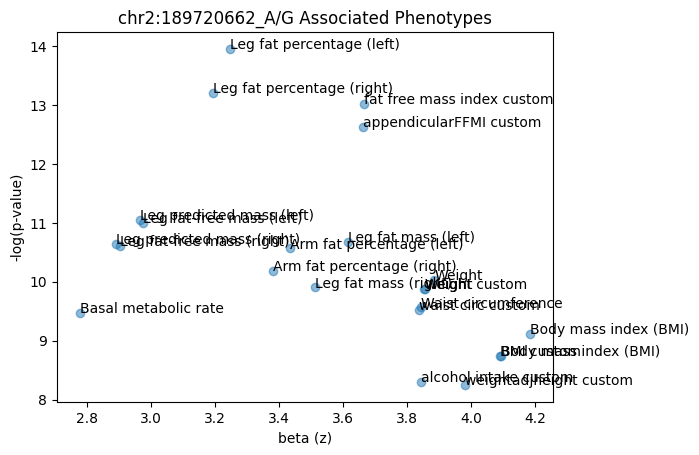

chr4:99318162_T/C
1872076    771750.0
Name: call_stats.AC, dtype: float64


<Figure size 640x480 with 0 Axes>

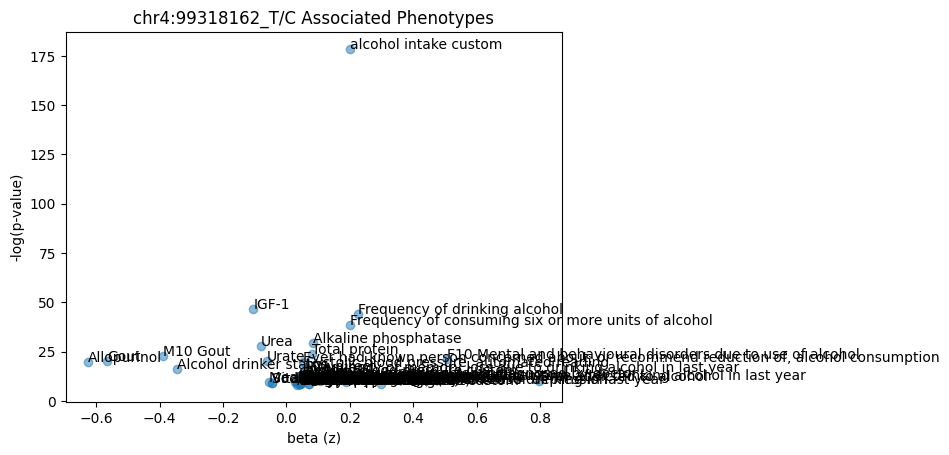

chr4:99347033_C/A
1872323    6489.0
Name: call_stats.AC, dtype: float64


<Figure size 640x480 with 0 Axes>

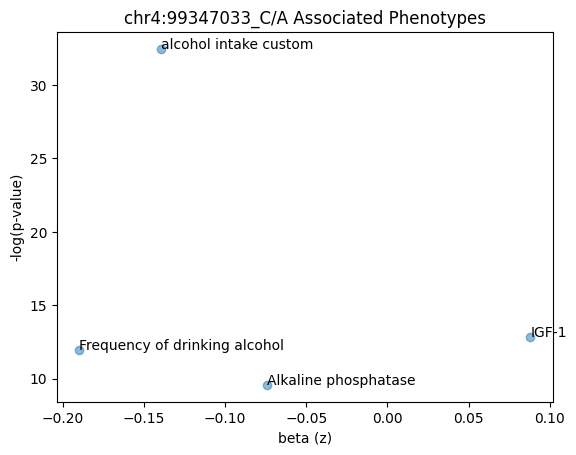

chr4:99653659_T/C
1875046    15610.0
Name: call_stats.AC, dtype: float64


<Figure size 640x480 with 0 Axes>

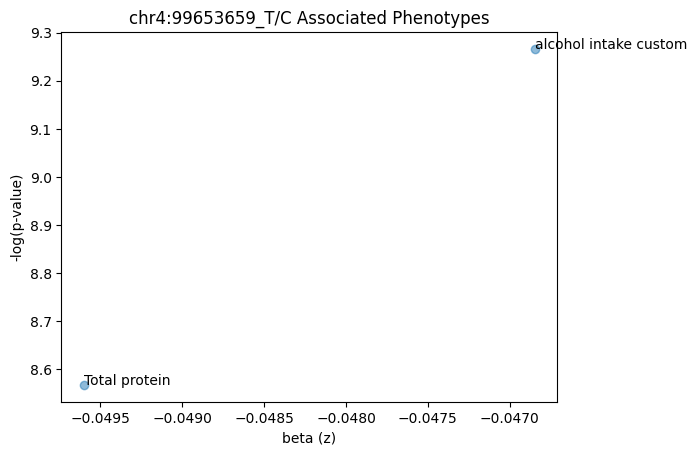

chr4:153204551_T/G
1944350    2.0
Name: call_stats.AC, dtype: float64


<Figure size 640x480 with 0 Axes>

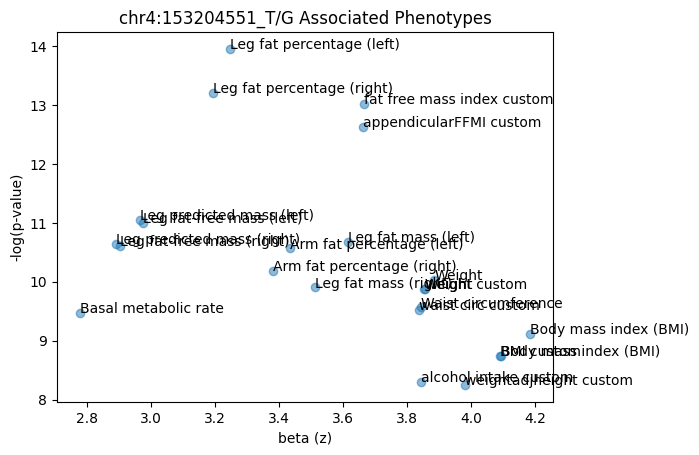

chr8:124562946_G/A
3265943    2.0
Name: call_stats.AC, dtype: float64


<Figure size 640x480 with 0 Axes>

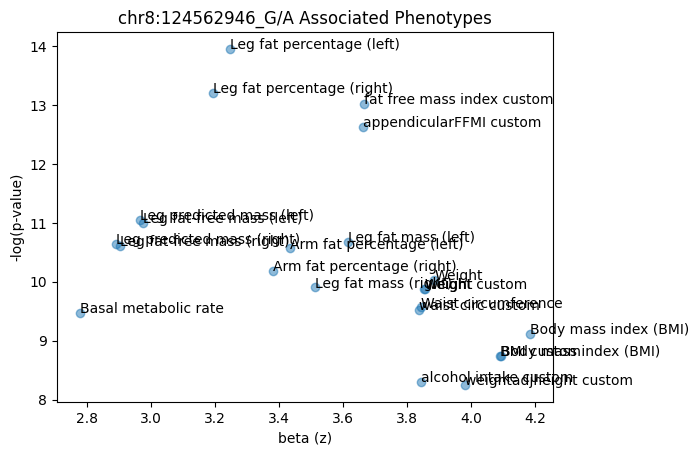

chr11:66421187_G/A
4215297    2.0
Name: call_stats.AC, dtype: float64


<Figure size 640x480 with 0 Axes>

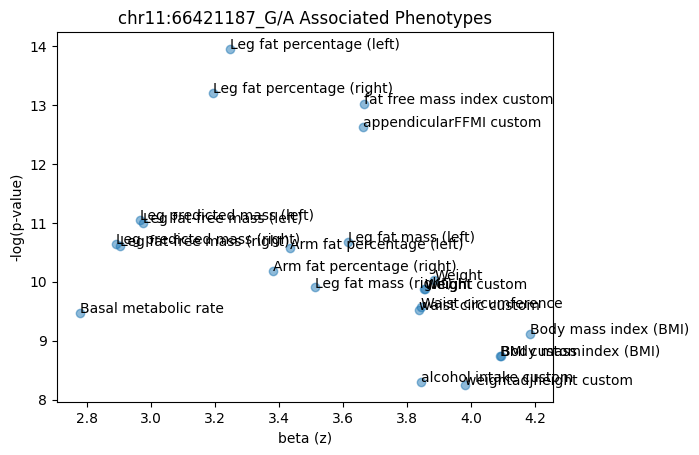

chr18:62958753_T/C
6363654    2.0
Name: call_stats.AC, dtype: float64


<Figure size 640x480 with 0 Axes>

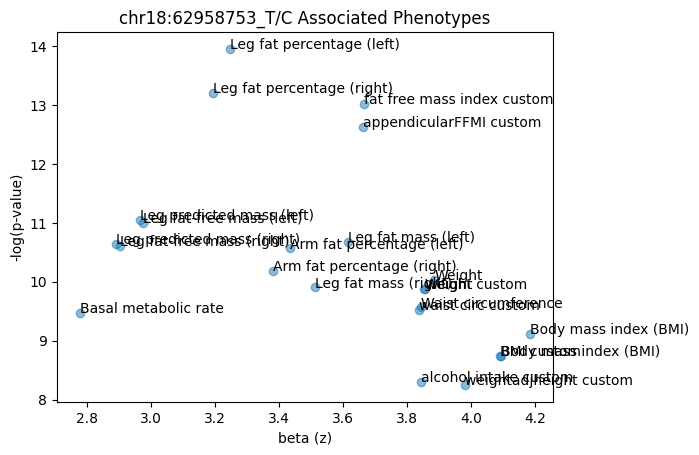

chrX:152653134_AAG/A
7564769    2.0
Name: call_stats.AC, dtype: float64


<Figure size 640x480 with 0 Axes>

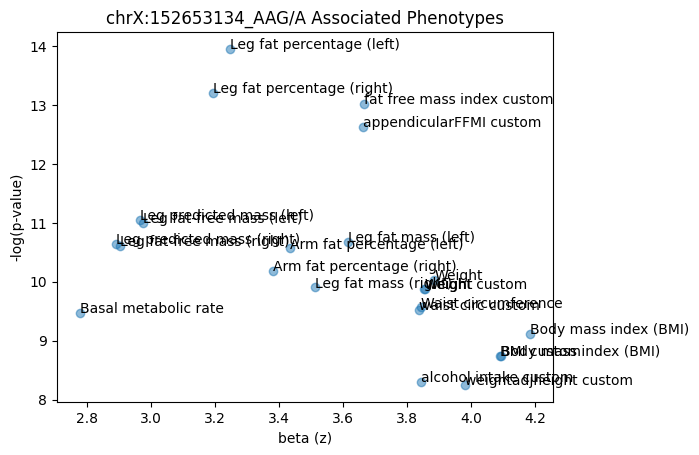

<Figure size 640x480 with 0 Axes>

In [15]:
for i in rare_var_sig.markerID:
    print(i)
    print(rare_var_sig[rare_var_sig.markerID==i]['call_stats.AC'])
    phewas=pd.read_csv(path+phewas_dict[i],sep=',')
    tbl=phewas[phewas['P-Value']<cutoff]
    fig=plt.figure()
    ax=fig.add_subplot()
    plt.scatter(tbl.Beta,-np.log10(tbl['P-Value']),alpha=0.5, color=color1)
    plt.title(i+" Associated Phenotypes")
    plt.ylabel('-log(p-value)')
    plt.xlabel('beta (z)')
    for j in tbl.index:
        #print(txt)
        #print(tbl.Beta[j])
        #print(-np.log10(tbl['P-Value'][j]))
        ax.annotate(tbl['Description'][j],
                    (tbl.Beta[j],-np.log10(tbl['P-Value'][j])))
    plt.show()
    plt.clf()

In [59]:
phewas=pd.read_csv(path+phewas_dict[rare_var_sig.markerID.iloc[0]],sep=',')

In [69]:
tbl=phewas[phewas['P-Value']<cutoff]

In [114]:
tbl

,Description,Phenotype,Trait type,Sex,Category,Info,N cases,N controls,P-Value,Beta,Select,Unnamed: 11,analysis_id
0,Leg fat percentage (left),23115,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387925,NaN,1.113599e-14,3.244927,NaN,NaN,continuous-23115-both_sexes--irnt
1,Leg fat percentage (right),23111,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387945,NaN,6.221780e-14,3.193728,NaN,NaN,continuous-23111-both_sexes--irnt
2,fat free mass index custom,fat_free_mass_index_custom,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387569,NaN,9.559042e-14,3.665913,NaN,NaN,continuous-fat_free_mass_index_custom-both_sex...
3,appendicularFFMI custom,appendicularFFMI_custom,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387704,NaN,2.376493e-13,3.663029,NaN,NaN,continuous-appendicularFFMI_custom-both_sexes-...
4,Leg predicted mass (left),23118,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387901,NaN,8.821928e-12,2.963894,NaN,NaN,continuous-23118-both_sexes--irnt
5,Leg fat-free mass (left),23117,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387906,NaN,1.004082e-11,2.975569,NaN,NaN,continuous-23117-both_sexes--irnt
6,Leg fat mass (left),23116,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387922,NaN,2.089371e-11,3.614331,NaN,NaN,continuous-23116-both_sexes--irnt
7,Leg predicted mass (right),23114,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387931,NaN,2.263640e-11,2.889755,NaN,NaN,continuous-23114-both_sexes--irnt
8,Leg fat-free mass (right),23113,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387932,NaN,2.479789e-11,2.902608,NaN,NaN,continuous-23113-both_sexes--irnt
9,Arm fat percentage (left),23123,continuous,NaN,UK Biobank Assessment Centre > Physical measur...,NaN,387830,NaN,2.721156e-11,3.434816,NaN,NaN,continuous-23123-both_sexes--irnt


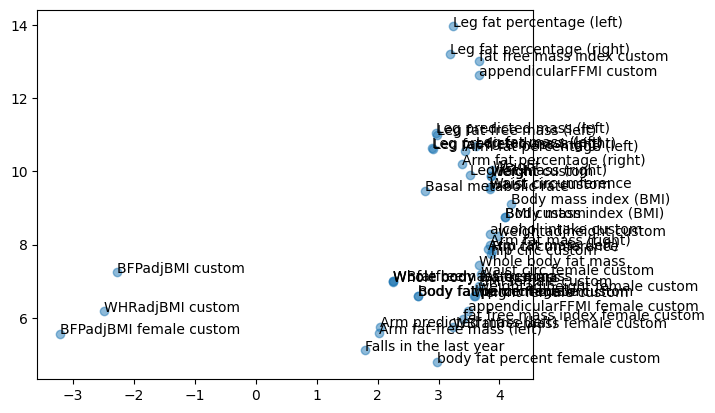

In [105]:
fig=plt.figure()
ax=fig.add_subplot()
plt.scatter(tbl.Beta,-np.log10(tbl['P-Value']),alpha=0.5)
for j in tbl.index:
    #print(txt)
    #print(tbl.Beta[j])
    #print(-np.log10(tbl['P-Value'][j]))
    ax.annotate(tbl['Description'][j],
                (tbl.Beta[j],-np.log10(tbl['P-Value'][j])))

# plot gene phewas

## determine cutoffs

In [4]:
rare_seed_tbl=pd.read_csv('rare_variant_genebass/alcohol_intake/alcohol_intake_FDR_25_full_table.csv')

In [5]:
rare_seed_tbl

,Gene Name,Gene Id,P-Value SKATO,P-Value Burden,P-Value SKAT,BETA Burden,Burden Set,Chrom : Position,Chrom,Position,burden_FDR,skato_FDR,skat_FDR
0,MMEL1,ENSG00000142606,3.680000e-05,1.690000e-05,2.805640e-03,0.001404,missense|LC,1.002587e+09,1,2586658,1.218783e-01,1.851740e-01,5.553512e-01
1,MTOR,ENSG00000198793,1.119600e-04,3.570000e-05,4.881025e-02,-0.018638,pLoF,1.011107e+09,1,11106515,1.490287e-01,2.425010e-01,7.791238e-01
2,AC118553.2,ENSG00000283761,1.379400e-04,1.276000e-04,4.530800e-04,-0.005127,synonymous,1.099970e+09,1,99970489,2.661468e-01,2.427581e-01,4.476320e-01
3,KIF21B,ENSG00000116852,6.350000e-05,1.406000e-04,4.769200e-04,-0.014921,pLoF,1.200974e+09,1,200973806,2.730307e-01,2.156670e-01,4.476320e-01
4,KDM5B,ENSG00000117139,4.340000e-05,2.250000e-05,1.012523e-02,-0.010240,pLoF,1.202729e+09,1,202728943,1.267093e-01,1.878924e-01,6.813484e-01
5,CHRM3,ENSG00000133019,6.250000e-05,5.240000e-05,1.137010e-03,-0.026184,pLoF,1.239907e+09,1,239907379,1.639658e-01,2.156670e-01,4.893474e-01
6,GCKR,ENSG00000084734,7.700000e-05,6.208300e-04,6.760000e-05,-0.001139,missense|LC,2.027492e+09,2,27492349,3.834424e-01,2.156670e-01,3.654019e-01
7,SCN7A,ENSG00000136546,2.270000e-05,5.111642e-02,1.080000e-05,0.000497,missense|LC,2.166406e+09,2,166405531,8.279038e-01,1.580621e-01,2.035862e-01
8,UBR3,ENSG00000144357,1.910000e-05,4.510000e-06,1.450049e-01,-0.022585,pLoF,2.169824e+09,2,169824452,5.078487e-02,1.539716e-01,8.581386e-01
9,FOXP1,ENSG00000114861,1.021400e-04,8.220000e-05,1.690500e-03,0.002416,missense|LC,3.070959e+09,3,70959160,2.012321e-01,2.300693e-01,5.091636e-01


In [6]:
burden_cutoff=max(rare_seed_tbl[rare_seed_tbl['burden_FDR']<.25]['P-Value Burden'])
burden_cutoff

8.22e-05

In [7]:
skato_cutoff=max(rare_seed_tbl[rare_seed_tbl['skato_FDR']<.25]['P-Value SKATO'])
skato_cutoff

0.00013794

In [8]:
skat_cutoff=max(rare_seed_tbl[rare_seed_tbl['skat_FDR']<.25]['P-Value SKAT'])
skat_cutoff

1.08e-05

## import data

awk 'FNR>1 || NR==1' phewas*.tsv > combined_phewas.tsv

In [14]:
path='/projects/ps-palmer/brittany/rare_common_alcohol/'

In [15]:
rare_datasets=pd.read_csv(path+'rare_datasets.csv')
common_datasets=pd.read_csv(path+'common_datasets.csv')

In [16]:
rare_seeds=list(pd.read_csv(path+rare_datasets['seed_path'][1])['Gene Name'])

In [17]:
common_seeds=list(pd.read_csv(path+common_datasets['seed_path'][4])['GENE_NAME'])

In [18]:
#set which network you're annotating
uuid_dict={'bonf_strin':'48de252c-3d50-11ee-aa50-005056ae23aa',
'FDR_25':'f81a3f67-4215-11ee-aa50-005056ae23aa'}

In [19]:
#read in network chosen above
analysis_dataset='FDR_25'
network = ndex2.create_nice_cx_from_server(server='public.ndexbio.org',username='bsleger',password='Pyjgor-3sarwe-puvfyb', uuid=uuid_dict[analysis_dataset])
nodes=list(nx.get_node_attributes(network, 'n').values())

In [20]:
ngenes=len(nodes)+len(rare_seeds)+len(common_seeds)
npheno=4529 #based on paper- number of phenotypes
cutoff=.05/(npheno)
cutoff_net=cutoff/len(nodes)
#cutoff=8e-9

In [21]:
cutoff_net

5.3076753231312744e-08

In [22]:
tbl_nodes=pd.read_csv("node_phewas_genebass/combined_phewas.tsv",sep='\t')

In [29]:
tbl_nodes=tbl_nodes[(tbl_nodes['Pvalue']< skato_cutoff) | (tbl_nodes['Pvalue_Burden']<burden_cutoff) |(tbl_nodes['Pvalue_SKAT']<skat_cutoff)]

In [30]:
tbl_nodes=tbl_nodes.fillna("")

In [31]:
tbl_nodes['description']=tbl_nodes['description'].str.lower()

In [32]:
tbl_nodes[tbl_nodes['description'].str.contains('alc')]

,gene_id,gene_symbol,annotation,interval,markerIDs,markerAFs,total_variants,Nmarker_MACCate_1,Nmarker_MACCate_2,Nmarker_MACCate_3,...,n_cases_females,n_cases_males,description,description_more,coding_description,category,Pvalue,Pvalue_Burden,Pvalue_SKAT,BETA_Burden
292,ENSG00000122729,ACO1,pLoF,[chr9:32405465-32459585),chr9:32407265_CT/C;chr9:32407344_GA/G;chr9:324...,6.33167865464492e-06;1.13975123029813e-05;1.13...,69,28,15,9,...,826,1611,non-alcoholic cirrhosis,"Derived using a combination of ICD10, ICD9 and...",,Health-related outcomes > Hepatobiliary,2.309000e-05,0.000393,0.000032,0.082259
627,ENSG00000187758,ADH1A,pLoF,[chr4:99276568-99291002),chr4:99279504_GA/G;chr4:99280143_C/T;chr4:9928...,1.01309424309196e-05;5.06535575259789e-06;2.40...,27,13,6,7,...,263310,221925,alcohol intake in grams per day,Alcohol intake is calculated by converting the...,,UK Biobank Assessment Centre > Touchscreen > L...,2.790900e-05,0.000203,0.000027,-0.00611
652,ENSG00000187758,ADH1A,pLoF|missense|LC,[chr4:99276568-99291002),chr4:99276630_C/T;chr4:99276643_C/A;chr4:99276...,1.26788671178653e-06;1.26838202651933e-06;3.80...,237,111,42,27,...,263310,221925,alcohol intake in grams per day,Alcohol intake is calculated by converting the...,,UK Biobank Assessment Centre > Touchscreen > L...,1.101800e-04,0.18617,0.00005,-0.001063
737,ENSG00000196616,ADH1B,missense|LC,[chr4:99307755-99321401),chr4:99307847_G/A;chr4:99307854_C/T;chr4:99307...,7.59811060316335e-06;8.86435011650289e-06;1.26...,205,87,31,17,...,263310,221925,alcohol intake in grams per day,Alcohol intake is calculated by converting the...,,UK Biobank Assessment Centre > Touchscreen > L...,8.425200e-05,0.92491,0.000048,-0.00002
792,ENSG00000196616,ADH1B,pLoF|missense|LC,[chr4:99307755-99321401),chr4:99307847_G/A;chr4:99307854_C/T;chr4:99307...,7.59811060316335e-06;8.86435011650289e-06;1.26...,235,106,35,19,...,263310,221925,alcohol intake in grams per day,Alcohol intake is calculated by converting the...,,UK Biobank Assessment Centre > Touchscreen > L...,8.288800e-05,0.80722,0.000046,0.000077
828,ENSG00000248144,ADH1C,pLoF,[chr4:99336654-99352753),chr4:99336778_T/C;chr4:99339655_G/GA;chr4:9933...,2.5327291929965e-06;1.26722475244764e-06;1.266...,21,12,7,4,...,15381,6189,alcohol drinker status,,Never,UK Biobank Assessment Centre > Touchscreen > L...,9.685700e-05,0.000093,0.000173,0.013411
831,ENSG00000248144,ADH1C,pLoF,[chr4:99336654-99352753),chr4:99336778_T/C;chr4:99339655_G/GA;chr4:9933...,2.5327291929965e-06;1.26722475244764e-06;1.266...,21,12,7,4,...,86845,66941,"ever had known person concerned about, or reco...","Question asked: ""Has a relative or friend or a...",,Online follow-up > Mental health > Alcohol use,8.180000e-06,0.000009,0.000008,-0.002014
832,ENSG00000248144,ADH1C,pLoF,[chr4:99336654-99352753),chr4:99336778_T/C;chr4:99339655_G/GA;chr4:9933...,2.5327291929965e-06;1.26722475244764e-06;1.266...,21,12,7,4,...,86858,66968,frequency of drinking alcohol,"Question asked: ""How often do you have a drink...",,Online follow-up > Mental health > Alcohol use,7.763300e-12,0.0,0.0,-0.008697
833,ENSG00000248144,ADH1C,pLoF,[chr4:99336654-99352753),chr4:99336778_T/C;chr4:99339655_G/GA;chr4:9933...,2.5327291929965e-06;1.26722475244764e-06;1.266...,21,12,7,4,...,77764,62686,frequency of consuming six or more units of al...,"Question asked: ""In the next two questions, a ...",,Online follow-up > Mental health > Alcohol use,2.719600e-05,0.000143,0.000028,-0.004669
843,ENSG00000248144,ADH1C,pLoF,[chr4:99336654-99352753),chr4:99336778_T/C;chr4:99339655_G/GA;chr4:9933...,2.5327291929965e-06;1.26722475244764e-06;1.266...,21,12,7,4,...,263310,221925,alcohol intake in grams per day,Alcohol intake is calculated by converting the...,,UK Biobank Assessment Centre > Touchscreen > L...,2.335800e-32,0.0,0.0,-0.006464


In [33]:
tbl_nodes['desc']=tbl_nodes.description+tbl_nodes['coding_description']+" ("+tbl_nodes.phenocode+")"

In [39]:
tbl_nodes['gene_symbol']

36         ABCG2
38         ABCG2
41         ABCG2
42         ABCG2
43         ABCG2
          ...   
11140    ZSCAN25
11147    ZSCAN32
11175    ZSCAN32
11178    ZSCAN32
11180    ZSCAN32
Name: gene_symbol, Length: 2465, dtype: object

In [34]:
tbl_nodes_cond=tbl_nodes[['gene_symbol','desc']].groupby('gene_symbol').agg(tuple).applymap(list).reset_index()

In [35]:
tbl_nodes_cond=pd.DataFrame({'gene_symbol':nodes}).merge(tbl_nodes_cond, on="gene_symbol", how="left")
tbl_nodes_cond=tbl_nodes_cond.fillna("")

In [36]:
tbl_nodes_cond

,gene_symbol,desc
0,STAM2,[operative procedures - main opcs4K25.5 Mitral...
1,SH3BP4,[sleep duration (quantitative) (sleep_duration...
2,OTUD6B,[operative procedures - main opcs4T59.4 Excisi...
3,RAD23A,"[mean corpuscular volume (30040), mean corpusc..."
4,HSP90AA1,[heel bone mineral density (bmd) (right) (4124...
...,...,...
203,APOC4,[operative procedures - main opcs4E49.5 Diagno...
204,ADH1C,[treatment/medication codelosartan potassium+h...
205,KIF12,"[treatment/medication codesumatriptan (20003),..."
206,LRRC37A2,[date m20 first reported (acquired deformities...


In [37]:
len(nodes)

208

In [ ]:
tbl_nodes_cond.to_csv('node_phewas_genebass/condensed_combined_phewas.tsv',sep="\t",index=False)

In [40]:
node_exp_tbl=pd.read_csv('Rare-Common Alcohol Consumption Tables - table 3. Alcohol Consumption Network Nodes.tsv',sep='\t')

In [41]:
node_exp_tbl=node_exp_tbl.drop('genebass_phewas',axis=1)

In [42]:
node_exp_tbl=node_exp_tbl.fillna("")

In [43]:
for i in node_exp_tbl.columns[11:21]:
    print(i)
    node_exp_tbl[i] = (node_exp_tbl[i]).str.split(",")

ALC_DISEASE/TRAIT
ALC_MAPPED_TRAIT
SMOK_DISEASE/TRAIT
SMOK_MAPPED_TRAIT
POLY_SUD_DISEASE/TRAIT
POLY_SUD_MAPPED_TRAIT
SUD_other_DISEASE/TRAIT
SUD_other_MAPPED_TRAIT
NEUROPSYCH_DISEASE/TRAIT
NEUROPSYCH_MAPPED_TRAIT


In [44]:
for i in node_exp_tbl.columns[11:21]:
    node_exp_tbl[i] = node_exp_tbl[i].apply(set)

In [45]:
tbl_nodes_cond.columns=['HGNC Symbol','genebass_phewas']

In [46]:
node_exp_tbl

,HGNC Symbol,NPS_zscore_rare,NPS_zscore_comb,NPS_zscore_common,seed_rare,seed_common,seed_both,in_GWAS_catalog,GTEX_GeneSet,GTEX adjP,...,ALC_MAPPED_TRAIT,SMOK_DISEASE/TRAIT,SMOK_MAPPED_TRAIT,POLY_SUD_DISEASE/TRAIT,POLY_SUD_MAPPED_TRAIT,SUD_other_DISEASE/TRAIT,SUD_other_MAPPED_TRAIT,NEUROPSYCH_DISEASE/TRAIT,NEUROPSYCH_MAPPED_TRAIT,PSYCHIATIC or SUD
0,ADH4,3.041711,5.132071,1.687231,False,False,False,True,"Liver, Minor_Salivary_Gland","2.01721127770111e-14, 0.0081619392076817",...,"{ "" ' alcohol dehydrogenase 4 measurement'""}, ...","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{'dementia in non-apoe e4 carriers'}""}}","{ ""{' dementia'""}, {"" 'apoe carrier status'}""}",True
1,ADHFE1,3.429860,8.753573,2.552166,False,False,False,True,"Adrenal_Gland, Brain_Cerebellar_Hemisphere, Br...","0.0077787592389012, 0.0097385667596327, 5.2345...",...,"{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{"" 'bipolar disorder'}"", ""{' bipolar i disor...","{{"" 'bipolar disorder'}"", ""{' bipolar i disor...",True
2,ADH1A,9.215802,21.048070,2.283911,True,False,False,True,Liver,2.02E-14,...,"{ "" ' alcohol use disorder measurement'}"", "" ...","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}",True
3,ADH5,3.546427,52.765696,14.878552,False,True,False,True,"Brain_Cerebellum, Brain_Hippocampus, Brain_Put...","5.23456863863061e-05, 0.0002015122440459, 7.28...",...,"{ "" 'alcohol dependence'""}, ""{' alcohol consu...","{{""{'smoking initiation'}""}}","{{""{'smoking initiation'}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}",True
4,ADH6,2.128644,23.784835,11.173704,False,True,False,True,"Colon_Transverse, Kidney_Cortex, Liver, Small_...","0.0106122487458016, 2.19134174292202e-13, 2.01...",...,"{ "" ' alcohol use disorder measurement'}"", "" ...","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,ACSS1,1.609365,15.483109,9.620633,False,True,False,True,"Adrenal_Gland, Brain_Cerebellum, Brain_Hypotha...","0.0077787592389012, 5.23456863863061e-05, 0.00...",...,"{ "" ' bitter alcoholic beverage consumption me...","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{ ""{' cognitive performance'""}, {"" 'cognitive ...","{{"" 'neuropsychological test'}"", ""{' neuropsy...",True
204,RABEP2,2.679518,31.853326,11.887707,False,True,False,True,"Adrenal_Gland, Brain_Amygdala, Brain_Anterior_...","0.0077787592389012, 6.30324639977141e-06, 0.00...",...,"{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{'cannabis use'}""}}","{{""{'cannabis use'}""}}","{{'{\'""parkinsons disease or first degree rela...","{{""{'parkinson disease'}""}}",True
205,GRK6,1.674957,29.582717,17.661777,False,True,False,True,"Adrenal_Gland, Brain_Amygdala, Brain_Caudate_b...","0.0077787592389012, 6.30324639977141e-06, 0.00...",...,"{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{ "" ' personality traits or cognitive traits (...","{{"" ' cognitive function measurement'}"", ""{'i...",True
206,LRRC37A2,2.627668,19.462410,7.406725,False,True,False,True,"Brain_Amygdala, Brain_Cerebellar_Hemisphere, B...","6.30324639977141e-06, 0.0097385667596327, 5.23...",...,"{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{""{''}""}}","{{"" ' post-traumatic stress disorder symptom s...","{ "" ' post-traumatic stress disorder symptom m...",True


In [47]:
node_exp_tbl.merge(tbl_nodes_cond, left_on='HGNC Symbol',right_on='HGNC Symbol', how="left").to_csv('Rare-Common Alcohol Consumption Tables - table 3. Alcohol Consumption Network Nodes.tsv',sep='\t',index=False)